In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from tqdm import tqdm

sns.set(style="whitegrid")
tqdm.pandas()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/Shareddrives/IBD-NLP-RiskPrediction_data/Reddit/interim/IBD_estructured_text.csv")
df.head()

,id,subreddit,author,title,selftext,created_utc,comments,cuerpo
0,dflwn,CrohnsDisease,zakool21,Don't be afraid of diagnostic procedures....,"I'm not likely to frontpage this subreddit, bu...",2010-09-18 11:59:11,"['I have to agree, the worse part of a Colonos...",TÍTULO:\nDon't be afraid of diagnostic procedu...
1,dfyy1,CrohnsDisease,sphinctersayzwha,Mayo Clinic article on Crohn's Disease.,Mayo Clinic article on Crohn's Disease.,2010-09-19 15:11:21,[],TÍTULO:\nMayo Clinic article on Crohn's Diseas...
2,dfz1m,CrohnsDisease,WeDeserveDessert,Has anyone else here taken Remicade? What did...,Has anyone else here taken Remicade? What did...,2010-09-19 15:19:54,"[""Remicade (and a bypass) changed my life. Wh...",TÍTULO:\nHas anyone else here taken Remicade? ...
3,dh6zd,CrohnsDisease,RosenTurd,"I was Diagnosed With Crohns Disease at age 9 ,...",Like the title Says AMA,2010-09-22 04:50:57,"[""My son was diagnosed at ten. It's hell for h...",TÍTULO:\nI was Diagnosed With Crohns Disease a...
4,dhgot,CrohnsDisease,unknownpleasures,Has anyone here had to have bowel surgery more...,I had a small bowel resection and appendectomy...,2010-09-22 18:31:36,"[""I have a story:\n\nI had a small bowel resec...",TÍTULO:\nHas anyone here had to have bowel sur...


In [6]:
print("Dimensiones del dataset:", df.shape)
print("\nInformación general:")
print(df.info())

print("\nEjemplo de valores faltantes:")
print(df.isnull().sum())

print("\nNúmero de publicaciones por subreddit:")
print(df['subreddit'].value_counts())

Dimensiones del dataset: (183744, 8)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183744 entries, 0 to 183743
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           183743 non-null  object
 1   subreddit    183744 non-null  object
 2   author       183682 non-null  object
 3   title        183744 non-null  object
 4   selftext     183744 non-null  object
 5   created_utc  183744 non-null  object
 6   comments     166250 non-null  object
 7   cuerpo       183744 non-null  object
dtypes: object(8)
memory usage: 11.2+ MB
None

Ejemplo de valores faltantes:
id                 1
subreddit          0
author            62
title              0
selftext           0
created_utc        0
comments       17494
cuerpo             0
dtype: int64

Número de publicaciones por subreddit:
subreddit
CrohnsDisease            105412
UlcerativeColitis         60788
IBD                       16767
crohnsa

In [7]:
# Longitud del texto principal
df['text_length'] = df['selftext'].apply(lambda x: len(str(x).split()))

# Estadísticas básicas
df['text_length'].describe()

,text_length
count,183744.000000
mean,103.304369
std,136.447155
min,0.000000
25%,19.000000
50%,67.000000
75%,137.000000
max,6447.000000


In [8]:
# Autores más activos
top_authors = df['author'].value_counts().head(10)
print("Autores más activos:")
print(top_authors)

Autores más activos:
author
[deleted]            22364
obviouspseudonym1      373
Robert_Larsson         268
Sully1102              184
enflure                183
Anxious-kisses         175
WaveJam                152
achchi                 145
trickybrod             145
covercash              136
Name: count, dtype: int64


In [9]:
# Publicaciones por año
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['year'] = df['created_utc'].dt.year

posts_per_year = df.groupby('year').size()
posts_per_year

,0
year,
1970,2
2010,29
2011,363
2012,1667
2013,2951
2014,3871
2015,4409
2016,5601
2017,7116


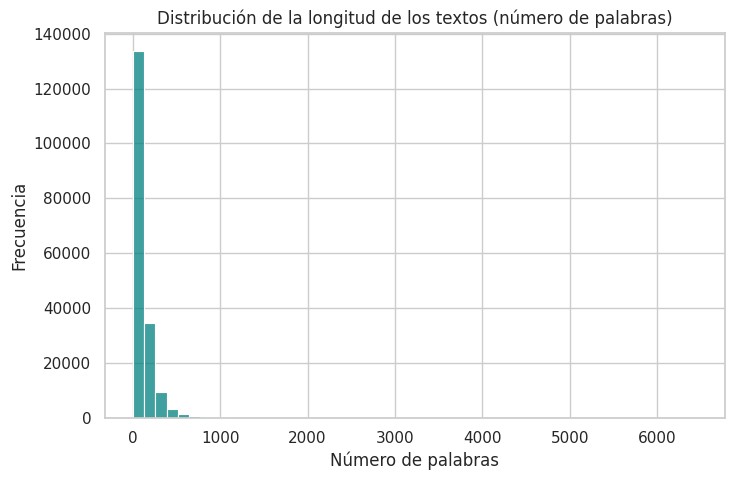

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, color='teal')
plt.title("Distribución de la longitud de los textos (número de palabras)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-3133802789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subreddit', palette='pastel')


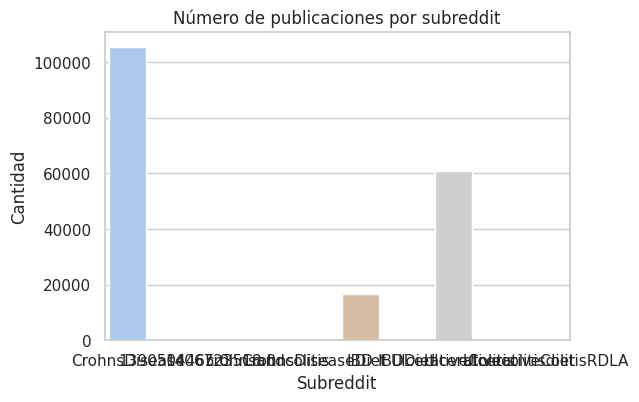

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='subreddit', palette='pastel')
plt.title("Número de publicaciones por subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Cantidad")
plt.show()

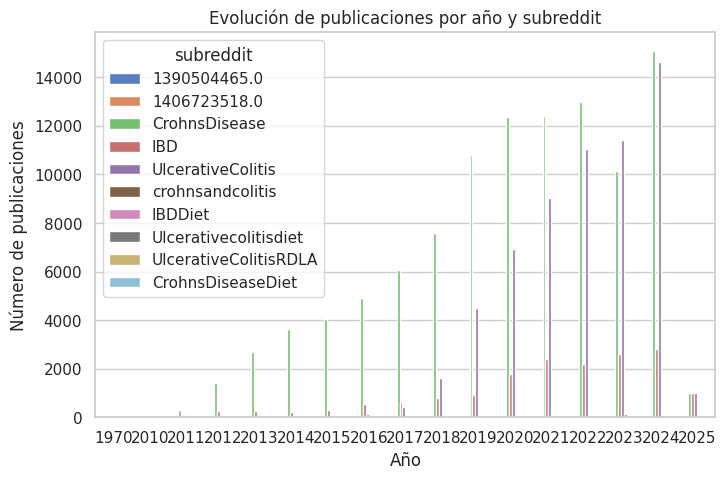

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='year', hue='subreddit', palette='muted')
plt.title("Evolución de publicaciones por año y subreddit")
plt.xlabel("Año")
plt.ylabel("Número de publicaciones")
plt.show()